In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
annotation = pd.read_csv("dataset3/annotations.csv")
annotation.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [4]:
images = annotation.image.unique()

In [5]:
train_images = images[:70]
test_images = images[70:]

In [6]:
yolo_train_dir = "exp/yolo/train"
yolo_test_dir = "exp/yolo/test"

for dd in [yolo_train_dir, yolo_test_dir]:
    for ss in ["images", "labels"]:
        print(os.path.join(dd, ss))
#         os.makedirs(os.path.join(dd, ss), exist_ok=True)

exp/yolo/train\images
exp/yolo/train\labels
exp/yolo/test\images
exp/yolo/test\labels


In [10]:
import glob
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt

(256, 256, 3)


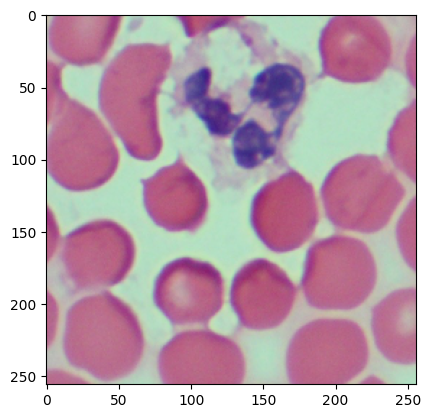

In [11]:
image = cv2.imread('dataset3/images/image-1.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [12]:
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [13]:
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [14]:
for image in train_images:
    lables_file = os.path.join(yolo_train_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))
        
for image in test_images:
    lables_file = os.path.join(yolo_test_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [15]:
SIZE_W = 640
SIZE_H = 640

In [16]:
SIZE = (SIZE_W, SIZE_H)

def replace_image(src_file, dst_file, size=SIZE):
    image = cv2.imread(src_file) 
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [17]:
train_images_dir = "dataset3/images"

for image in train_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_train_dir, 'images', image)
    replace_image(src_file, dst_file)
        
for image in test_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_test_dir, 'images', image)
    replace_image(src_file, dst_file)

exp/yolo/train\images\image-100.png
exp/yolo/train\labels\image-100.txt


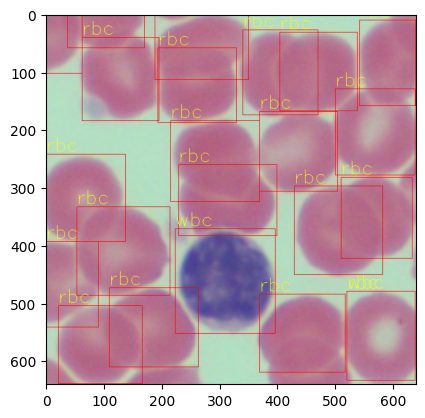

In [18]:
def draw_image(image_file, label_file, class_names):   
    image = cv2.imread(image_file)
        
    with open(label_file) as fobj:
        while True:            
            item = fobj.readline()
            if item is None or len(item)<=0:
                break
                
            item = item.split()
            
            lb = int(item[0])
            xc = float(item[1]) * SIZE_W
            yc = float(item[2]) * SIZE_H
            w = float(item[3]) * SIZE_W
            h = float(item[4]) * SIZE_H
        
            image = cv2.rectangle(image, (int(xc - w/2), int(yc - h/2)), (int(xc + w/2), int(yc + h/2)), (0,0,255), 1)
            image = cv2.putText(image, class_names[lb], (int(xc - w/2), int(yc - h/2 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 255), 1)
        
    return image

train_file = train_images[0]
image_file = os.path.join(yolo_train_dir, 'images', train_file)
label_file = os.path.join(yolo_train_dir, 'labels', train_file.replace(".png", ".txt"))

print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image);

In [33]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%cd -

D:\Documents\Miscellaneous\Side Projects\citramed_docs\citramed-blood_detection\yolov5


Cloning into 'yolov5'...


  Using cached PyYAML-6.0-cp310-cp310-win_amd64.whl (151 kB)
     -------------------------------------- 162.2/162.2 MB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 7.5 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 9.9 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
     ------------------------------------- 169.8/169.8 kB 10.6 MB/s eta 0:00:00
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
     -------------------------------------- 232.7/232.7 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 93.3/93.3 kB 5.5 MB/s eta 0:00:00
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached request

In [34]:
yaml_file="yolov5/data/blood_cell.yaml"
train_images_dir = os.path.join("..", yolo_train_dir, "images")
val_images_dir = os.path.join("..", yolo_test_dir, "images")


names_str=""
for item in cells_classes:
    names_str=names_str + ", \'%s\'"%item
names_str= "names: ["+names_str[1:]+"]"

with open(yaml_file, "w") as wobj:
    wobj.write("train: %s\n"%train_images_dir)
    wobj.write("val: %s\n"%val_images_dir)
    wobj.write("nc: %d\n"%len(cells_classes))
    wobj.write(names_str+"\n")

In [37]:
%cd yolov5
!bash data/scripts/download_weights.sh

D:\Documents\Miscellaneous\Side Projects\citramed_docs\citramed-blood_detection\yolov5


data/scripts/download_weights.sh: line 10: $'\r': command not found
data/scripts/download_weights.sh: line 11: python: command not found


In [42]:
!python train.py --data data/blood_cell.yaml --batch-size 4 --epochs 300 --img-size 640 --project runs/train --name blood_cell --weights weights/yolov5s.pt --device 0

^C


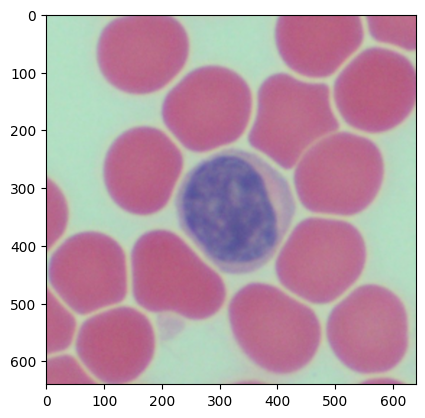

In [19]:
img = cv2.imread("exp/yolo/test/images/image-4.png")
plt.imshow(img[:,:,2::-1]);

In [24]:
import torch
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/blood_cell/weights/best.pt', source='local')
# Images
imgs = ['atlas hematologi/atlas/88/image-173.jpg']  # batch of images

YOLOv5  2022-10-8 Python-3.10.7 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [25]:
results = model(imgs)

In [26]:
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0] 

image 1/1: 525x700 24 rbcs
Speed: 4.0ms pre-process, 94.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp7


,xmin,ymin,xmax,ymax,confidence,class,name
0,654.260620,419.269196,700.000000,468.276733,0.865893,0,rbc
1,0.825209,261.240631,37.508751,309.763092,0.742042,0,rbc
2,484.285187,36.609951,540.099304,89.300621,0.700599,0,rbc
3,271.152924,485.385773,309.739929,524.604492,0.667178,0,rbc
4,465.285736,491.158539,506.578094,525.000000,0.661850,0,rbc
5,659.512695,1.099466,700.000000,35.447365,0.648704,0,rbc
6,118.728996,389.368103,172.885605,442.610565,0.643736,0,rbc
7,503.554016,0.000000,590.469543,25.411045,0.623291,0,rbc
8,309.015747,100.453163,367.841675,156.742889,0.544495,0,rbc
9,318.700104,0.066584,370.103821,38.664295,0.537264,0,rbc


## Image Preprocess

In [4]:
import cv2
import matplotlib.pyplot as plt

(256, 256, 3)


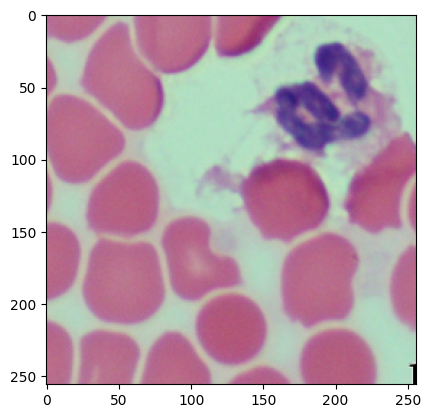

In [5]:
image = cv2.imread('dataset3/images/image-2.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

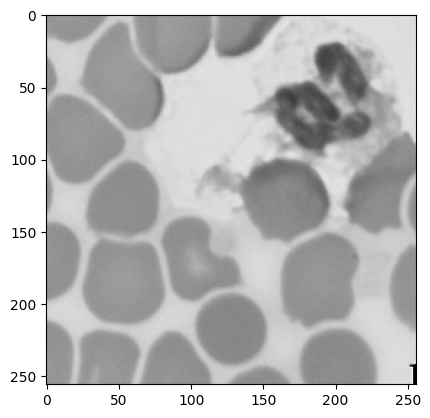

In [9]:
img_gray_mode = cv2.imread('dataset3/images/image-2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray_mode,cmap="gray")